In [1]:
# 1. Read the column description and ensure you understand each attribute well


In [2]:
'''
ID:Customer ID, Age : Customer's age in completed years, Experience: #years of professional experience,
Income:Annual income of the customer ($000), ZIPCode: Home Address ZIP code.Family: Family size of the customer,
CCAvg:	Avg. spending on credit cards per month ($000),Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional,Mortgage: Value of house mortgage if any. ($000),Personal Loan: Did this customer accept the personal loan offered in the last campaign?, Securities Account: Does the customer have a securities account with the bank? CD Account:Does the customer have a certificate of deposit (CD) account with the bank?,
Online: Does the customer use internet banking facilities?,
CreditCard: Does the customer use a credit card issued by UniversalBank?,


A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. 
hence the presense of 1 in the personal loan indicates customer has opted and got converted, 0 indicates customer did not opt for personal loan

'''

"\nID:Customer ID, Age : Customer's age in completed years, Experience: #years of professional experience,\nIncome:Annual income of the customer ($000), ZIPCode: Home Address ZIP code.Family: Family size of the customer,\nCCAvg:\tAvg. spending on credit cards per month ($000),Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional,Mortgage: Value of house mortgage if any. ($000),Personal Loan: Did this customer accept the personal loan offered in the last campaign?, Securities Account: Does the customer have a securities account with the bank? CD Account:Does the customer have a certificate of deposit (CD) account with the bank?,\nOnline: Does the customer use internet banking facilities?,\nCreditCard: Does the customer use a credit card issued by UniversalBank?,\n\n\nA campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. \nhence the presense of 1 in the personal loan indicates customer has opted and g

In [3]:
# 2. Study the data distribution in each attribute, share your findings. (5 points)




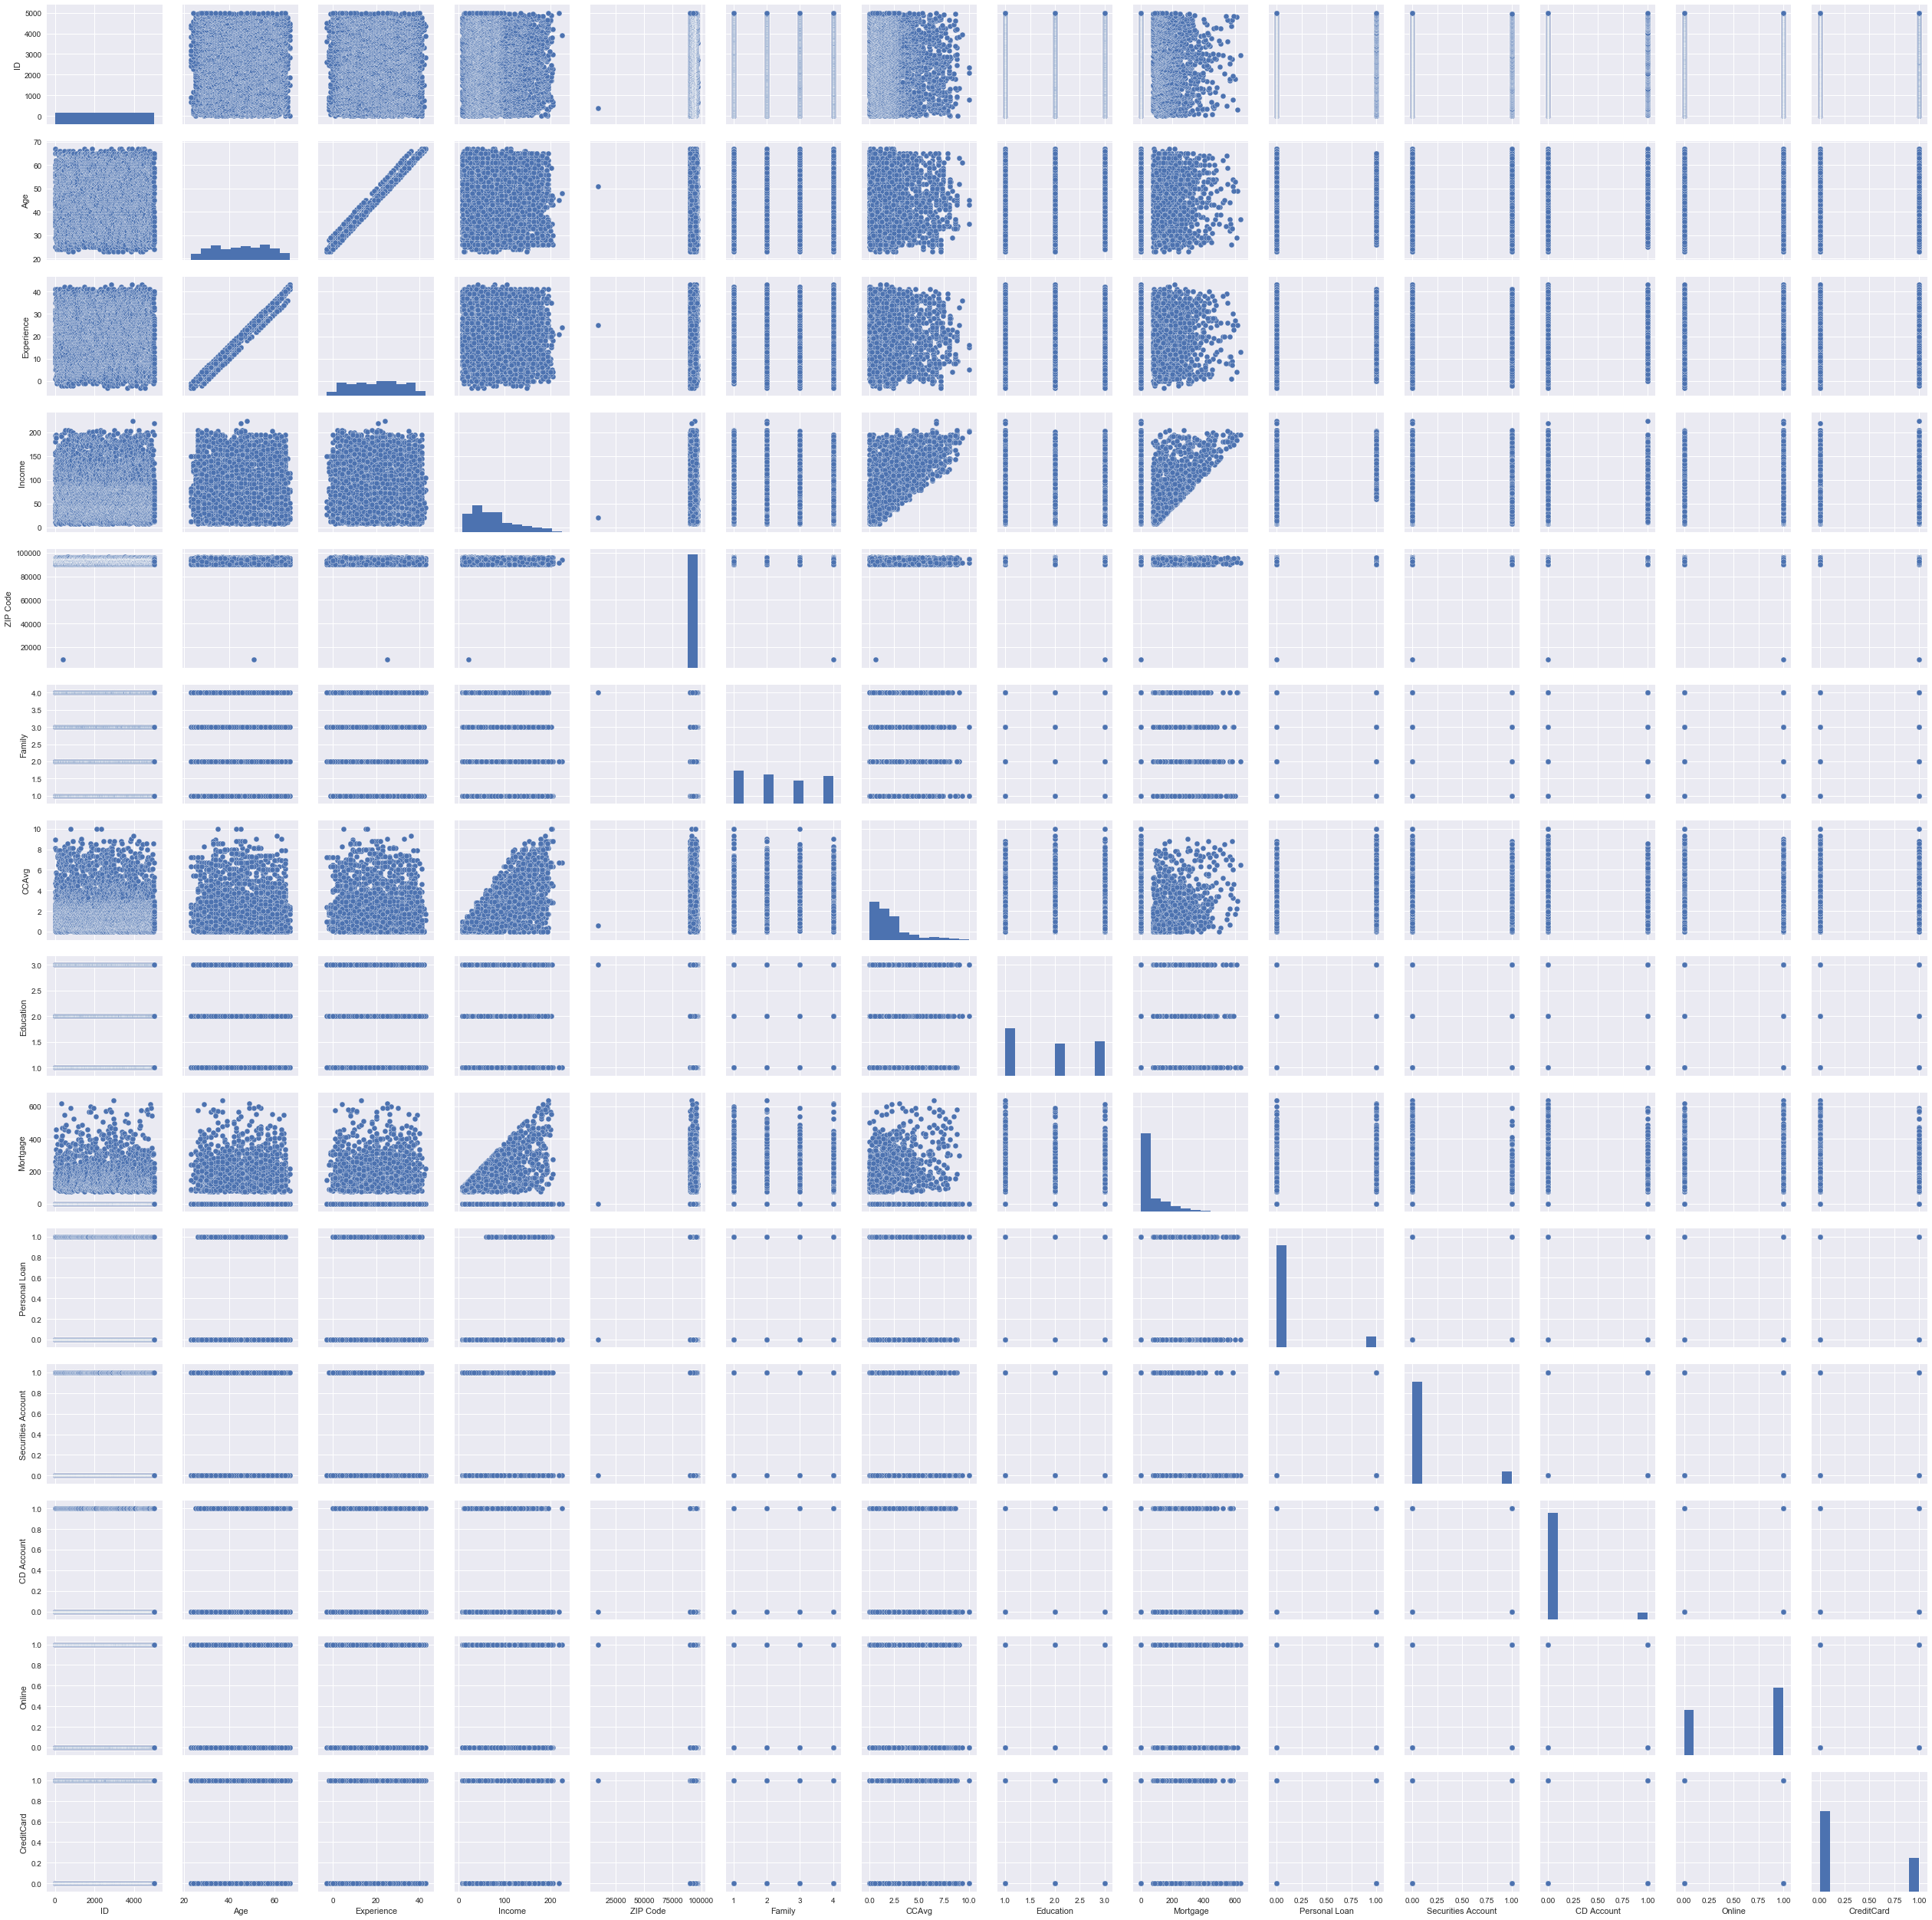

In [4]:
#import relevant files

import warnings 

warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
from sklearn import metrics
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns;sns.set()
bank_df=pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
bank_df.corr()
#bank_pd.describe()
#bank_pd.info()
sns.pairplot(bank_df,kind='scatter')
# CC average and income has +ve correlation, age and experiance has + correlation, mortgauge and incorm has +ve correlation

# 3. Get the target column distribution. Your comments





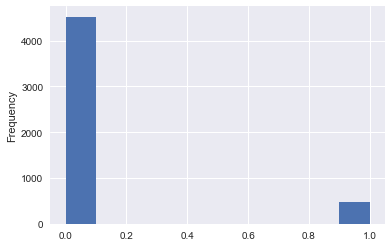

In [5]:
# we need to predict if a customer can potentially become an asset customer i.e. likly hood of personal loan being opted,   given the parameters, following is the distribution.

bank_df['Personal Loan'].plot.hist()

# 4. Split the data into training and test set in the ratio of 70:30 respectively



In [6]:
X = bank_df.drop("Personal Loan" , axis=1)
y = bank_df.pop("Personal Loan")
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [7]:
# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)


In [8]:
#Logistic regression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
logisticRegr.score(x_train, y_train)
predictedL = logisticRegr.predict(x_test)
print predictedL
probs = logisticRegr.predict_proba(x_test)
print probs


[0 0 0 ... 0 0 0]
[[0.94480328 0.05519672]
 [0.98663075 0.01336925]
 [0.99295416 0.00704584]
 ...
 [0.9937018  0.0062982 ]
 [0.99196076 0.00803924]
 [0.99248098 0.00751902]]


In [9]:
#KNN  regression
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform', metric='euclidean')
NNH.fit(x_train, y_train)
predicted_labels_KNN = NNH.predict(x_test)
accuracy_score(y_test.values,predicted_labels_KNN)

0.902

In [10]:
#NaiveBayes Model
model = GaussianNB()
model.fit(x_train, y_train)
expected = y_test
predicted_NB = model.predict(x_test)
print predicted_NB

[0 0 0 ... 0 0 0]


# 6. Print the confusion matrix for all the above models (5 points)



# 7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

In [11]:
print metrics.confusion_matrix(y_test, predictedL)
print metrics.classification_report(y_test, predictedL)

[[1319   32]
 [ 106   43]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.29      0.38       149

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.75      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500



In [12]:
print metrics.confusion_matrix(y_test, predicted_labels_KNN)
print metrics.classification_report(y_test, predicted_labels_KNN)

[[1349    2]
 [ 145    4]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.67      0.03      0.05       149

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.78      0.51      0.50      1500
weighted avg       0.88      0.90      0.86      1500



In [13]:
print metrics.confusion_matrix(y_test, predicted_NB)
print metrics.classification_report(y_test, predicted_NB)

[[1239  112]
 [  64   85]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.43      0.57      0.49       149

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



('model:', 'Logistic')
('thresholds:', array([1.83 , 0.83 , 0.808, 0.769, 0.765, 0.752, 0.72 , 0.72 , 0.716,
       0.715, 0.713, 0.703, 0.695, 0.694, 0.674, 0.659, 0.659, 0.646,
       0.641, 0.641, 0.631, 0.62 , 0.618, 0.605, 0.604, 0.6  , 0.582,
       0.576, 0.566, 0.563, 0.557, 0.555, 0.543, 0.541, 0.535, 0.53 ,
       0.522, 0.507, 0.499, 0.495, 0.495, 0.494, 0.483, 0.478, 0.47 ,
       0.466, 0.46 , 0.456, 0.456, 0.451, 0.447, 0.445, 0.443, 0.428,
       0.417, 0.414, 0.413, 0.411, 0.406, 0.402, 0.401, 0.377, 0.377,
       0.354, 0.353, 0.351, 0.346, 0.342, 0.342, 0.329, 0.325, 0.319,
       0.312, 0.307, 0.307, 0.305, 0.295, 0.292, 0.291, 0.289, 0.289,
       0.286, 0.283, 0.278, 0.275, 0.264, 0.262, 0.247, 0.24 , 0.238,
       0.237, 0.237, 0.235, 0.234, 0.234, 0.233, 0.216, 0.215, 0.214,
       0.199, 0.196, 0.189, 0.189, 0.189, 0.188, 0.186, 0.186, 0.182,
       0.18 , 0.179, 0.177, 0.175, 0.174, 0.161, 0.16 , 0.158, 0.157,
       0.155, 0.155, 0.149, 0.148, 0.146, 0.146, 0.

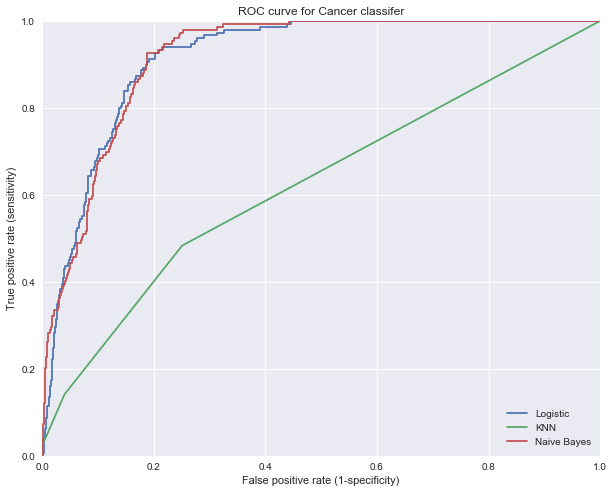

In [14]:
# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
from matplotlib import pyplot as plt
y_pred_lgr_p =logisticRegr.predict_proba(x_test)[:,1]
y_pred_knn_p =NNH.predict_proba(x_test)[:,1]
y_pred_NB_p =model.predict_proba(x_test)[:,1]


models=[y_pred_lgr_p,y_pred_knn_p,y_pred_NB_p]
label=['Logistic','KNN','Naive Bayes']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(3)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    print('model:',label[m])
    print('thresholds:',np.round(thresholds,3))
    print('tpr:       ',np.round(tpr,3))
    print('fpr:       ',np.round(fpr,3))
    plt.plot(fpr,tpr,label=label[m])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for Cancer classifer')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.legend(loc=4,)

In [15]:
#from ROC curve and confusion matrix KNN seems least performing . where as Logistics and Naive Bayes are almost same  